In [1]:
import pandas as pd

# load dataset
dataset = pd.read_csv("Live.csv")
dataset.head()

# The dataset is about live selling. To understand the link between with products and the customers
#   we will use variety of reactions, number of comments, number of shares

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [4]:
# import KMeans model
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [5]:
# train the model
model.fit(dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [6]:
labels = model.predict(dataset)

In [7]:
import numpy as np

# check how many instances in each group
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([2334, 4288,  428]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, The Silhouette Coefficient is 0.8188237721696822


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, The Silhouette Coefficient is 0.8972493682244883


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, The Silhouette Coefficient is 0.9106664962327088


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, The Silhouette Coefficient is 0.8866768371183754


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, The Silhouette Coefficient is 0.8430118288915796


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, The Silhouette Coefficient is 0.8419421782294257


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, The Silhouette Coefficient is 0.8370052625268489


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, The Silhouette Coefficient is 0.7608537700441694


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, The Silhouette Coefficient is 0.7189218988570386


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=11, The Silhouette Coefficient is 0.7156211362553957


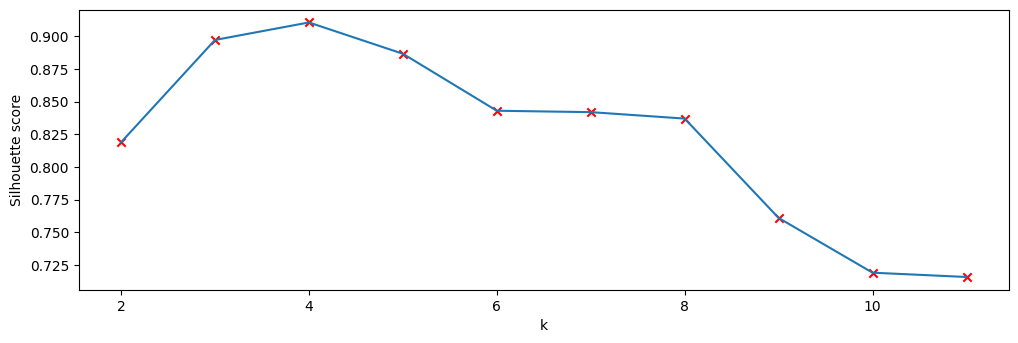

In [8]:
# import the evaluation metric
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# we will check k values in a range to get best output
silhouettes = []
ks = list(range(2, 12))
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(dataset)
    label = kmeans.labels_
    sil_coeff = silhouette_score(dataset, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

# Create a graph
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score');

Note: As we see above, the best k value is 4

In [9]:
# Let's do again with k=4
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(dataset)
labels = model.predict(dataset)
import numpy as np
np.unique(labels, return_counts=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3], dtype=int32), array([4288, 2334,  365,   63]))

In [11]:
dataset["labels"] = labels
dataset

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,labels
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0,1
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0,1
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0,0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0


In [13]:
# how many in each label
dataset["labels"].value_counts()

0    4288
1    2334
2     365
3      63
Name: labels, dtype: int64

In [14]:
# Let's check average number of comments in each group

group_zero = dataset[dataset["labels"]==0]["num_comments"].mean()
group_zero

0.0007619566531325948

In [15]:
group_one = dataset[dataset["labels"]==1]["num_comments"].mean()
group_one

# Biggest value, so the most popular group among users

0.030608773182480054

In [16]:
group_two = dataset[dataset["labels"]==2]["num_comments"].mean()
group_two

0.0017264581307471548

In [17]:
group_three = dataset[dataset["labels"]==3]["num_comments"].mean()
group_three

0.00027148226290672723

____

In [18]:
# Let's check average number of shares in each group


group_zero = dataset[dataset["labels"]==0]["num_shares"].mean()
group_zero

0.0007458736181824375

In [22]:
group_one = dataset[dataset["labels"]==1]["num_shares"].mean()
group_one

# Biggest value, so the most popular group among users

0.033785031713235436

In [20]:
group_two = dataset[dataset["labels"]==2]["num_shares"].mean()
group_two

0.0007473434899500528

In [21]:
group_three = dataset[dataset["labels"]==3]["num_shares"].mean()
group_three

0.001284119566829822

In [23]:
status_type = dataset[["status_type_photo", "status_type_video", "status_type_status"]].idxmax(axis=1)
dataset = pd.concat([dataset["labels"],status_type.rename("status_type")], axis=1)

In [25]:
# See each group's status type, so we can say why group one is most popular
dataset.groupby(["labels","status_type"])["status_type"].count()

labels  status_type       
0       status_type_photo     4288
1       status_type_video     2334
2       status_type_status     365
3       status_type_photo       63
Name: status_type, dtype: int64